In [7]:
import yfinance as yf
import talib as ta
from pyalgotrade import strategy
from pyalgotrade.barfeed import yahoofeed



In [30]:
data = yf.download('BAJAJFINSV.NS', '2010-01-01', '2020-06-01')
# data.to_csv('BAJAJFINSV.csv')
data['ema50'] = ta.EMA(data['Adj Close'], timeperiod = 50)
data['ema200'] = ta.EMA(data['Adj Close'], timeperiod = 200)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ema50,ema200
Date,,,,,,,,
2010-01-04,343.321716,354.914764,340.177826,353.146332,347.977509,246992,NaN,NaN
2010-01-05,358.598999,365.181519,350.788422,353.932312,348.751923,195572,NaN,NaN
2010-01-06,353.686707,355.651611,343.960297,345.581360,340.523224,69104,NaN,NaN
2010-01-07,345.826996,350.690186,340.914673,342.879608,337.860992,47777,NaN,NaN
2010-01-08,346.809448,351.967377,341.897125,343.862061,338.829132,53881,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-05-22,4509.100098,4578.450195,4087.000000,4315.549805,4315.549805,2725016,5471.349729,7164.044569
2020-05-26,4360.000000,4400.000000,4051.800049,4097.250000,4097.250000,1575601,5417.463465,7133.529200
2020-05-27,4100.000000,4276.950195,3985.300049,4258.049805,4258.049805,2498677,5371.996263,7104.917465


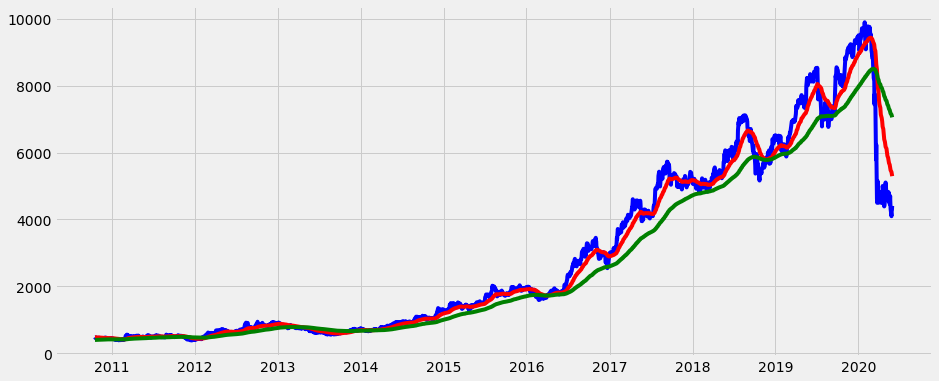

In [31]:
import matplotlib.pyplot as plt
data = data.dropna()
plt.figure(figsize=(14,6))
plt.plot(data['Adj Close'], color='b', label = 'Ticker price')
plt.plot(data['ema50'], color = 'r', label = '50 EMA')
plt.plot(data['ema200'], color = 'g', label = '200 EMA')

# plt.legend()
plt.show()

In [13]:
def long(data, loc):
    if(data.iloc[loc,6] > data.iloc[loc,7]):
        return True
    
def short(data, loc):
    if(data.iloc[loc,6] < data.iloc[loc, 7]):
        return True



In [17]:
import pandas as pd
bse500_metadata = pd.read_csv('S&P BSE 500index_Constituents.csv')
bse500_metadata.head()

,Scrip Code,COMPANY,ISIN No.,Close Price
0,523395,3M India Ltd,INE470A01017,25456.15
1,524348,Aarti Drugs Ltd,INE767A01016,719.90
2,524208,Aarti Industries Ltd.,INE769A01020,1775.15
3,541988,AAVAS Financiers Ltd,INE216P01012,2518.40
4,500002,ABB India Ltd,INE117A01022,1740.80


In [3]:
feed = yahoofeed.Feed()
feed.addBarsFromCSV("BAJAJFINSV.NS", "BAJAJFINSV.csv")

In [4]:
class Golden_Cross_Strategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument):
        super(Golden_Cross_Strategy, self).__init__(feed)
        self.instrument = instrument
        self.setUseAdjustedValues(True)
        self.position = None
    
    def onEnterOk(self, position):
        self.info(f'{position.getEntryOrder().getExecutionInfo()}')
        
    def onBars(self, bars):
        bar = bars[self.instrument]
        
        if self.position is None:
            close = bar.getClose()
            broker = self.getBroker()
            cash = broker.getCash()
            quantity = cash/close
            
            self.position = self.enterLong(self.instrument, quantity)
        

In [5]:
strategy = Golden_Cross_Strategy(feed, 'BAJAJFINSV.NS')
strategy.run()

2002-08-13 00:00:00 strategy [INFO] 2002-08-13 00:00:00 - Price: 445.90004870805967 - Amount: 2205 - Fee: 0


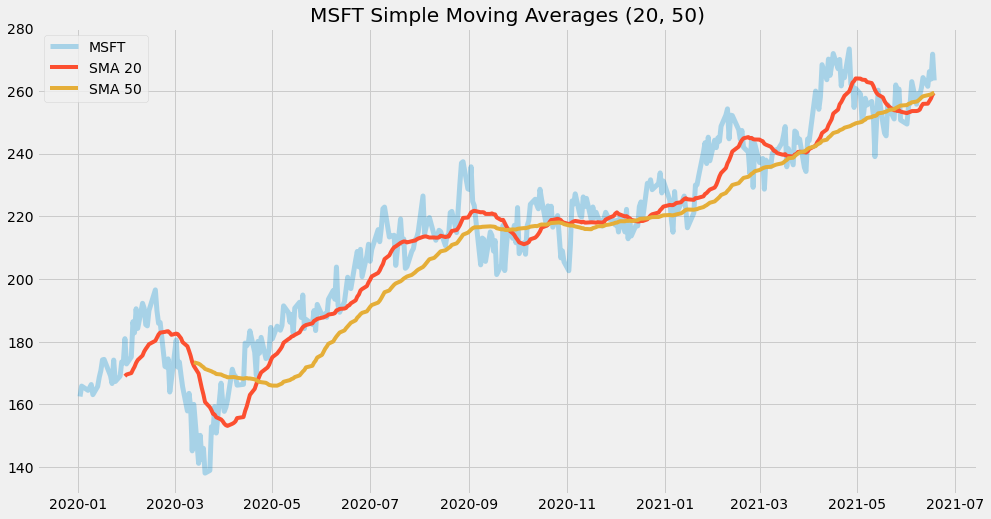

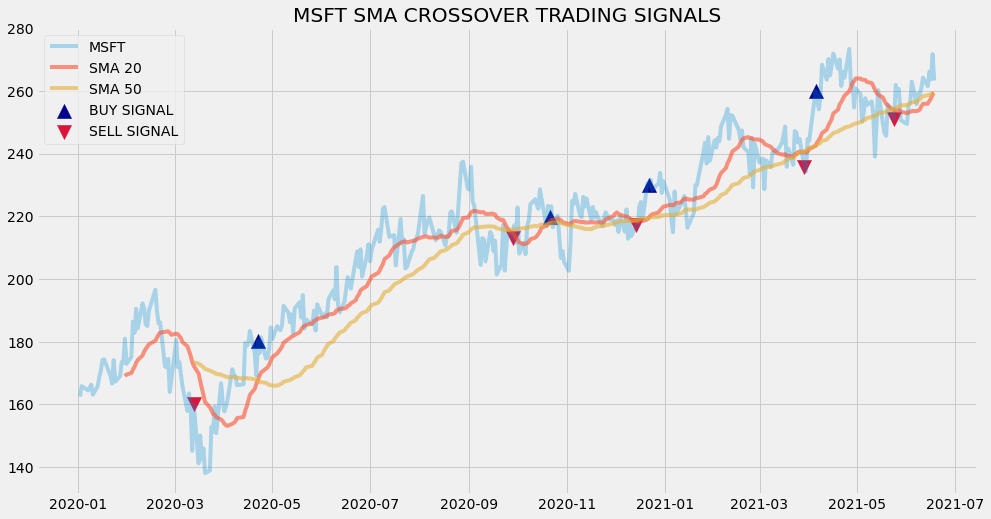

NameError: name 'cl' is not defined

In [19]:
# IMPORTING PACKAGES

import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
# from termcolor import colored as cl 
import numpy as np

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# EXTRACTING DATA

def get_historic_data(symbol):
    ticker = symbol
    iex_api_key = 'Tsk_30a2677082d54c7b8697675d84baf94b'
    api_url = f'https://sandbox.iexapis.com/stable/stock/{ticker}/chart/max?token={iex_api_key}'
    df = requests.get(api_url).json()
    
    date = []
    open = []
    high = []
    low = []
    close = []
    
    for i in range(len(df)):
        date.append(df[i]['date'])
        open.append(df[i]['open'])
        high.append(df[i]['high'])
        low.append(df[i]['low'])
        close.append(df[i]['close'])
    
    date_df = pd.DataFrame(date).rename(columns = {0:'date'})
    open_df = pd.DataFrame(open).rename(columns = {0:'open'})
    high_df = pd.DataFrame(high).rename(columns = {0:'high'})
    low_df = pd.DataFrame(low).rename(columns = {0:'low'})
    close_df = pd.DataFrame(close).rename(columns = {0:'close'})
    frames = [date_df, open_df, high_df, low_df, close_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    return df

msft = get_historic_data('MSFT')
msft = msft.set_index('date')
msft = msft[msft.index >= '2020-01-01']
msft.index = pd.to_datetime(msft.index)
msft.to_csv('msft.csv')

# IMPORTING DATA

msft = pd.read_csv('msft.csv').set_index('date')
msft.index = pd.to_datetime(msft.index)

# DEFINING SMA FUNCTION

def sma(data, n):
    sma = data.rolling(window = n).mean()
    return pd.DataFrame(sma)

n = [20, 50]
for i in n:
    msft[f'sma_{i}'] = sma(msft['close'], i)

# PLOTTING SMA VALUES

plt.plot(msft['close'], label = 'MSFT', linewidth = 5, alpha = 0.3)
plt.plot(msft['sma_20'], label = 'SMA 20')
plt.plot(msft['sma_50'], label = 'SMA 50')
plt.title('MSFT Simple Moving Averages (20, 50)')
plt.legend(loc = 'upper left')
plt.show()

# CREATING SMA TRADING STRATEGY

def implement_sma_strategy(data, short_window, long_window):
    sma1 = short_window
    sma2 = long_window
    buy_price = []
    sell_price = []
    sma_signal = []
    signal = 0
    
    for i in range(len(data)):
        if sma1[i] > sma2[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                sma_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                sma_signal.append(0)
        elif sma2[i] > sma1[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                sma_signal.append(-1)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                sma_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            sma_signal.append(0)
            
    return buy_price, sell_price, sma_signal

sma_20 = msft['sma_20']
sma_50 = msft['sma_50']

buy_price, sell_price, signal = implement_sma_strategy(msft['close'], sma_20, sma_50)

# PLOTTING SMA TRADE SIGNALS

plt.plot(msft['close'], alpha = 0.3, label = 'MSFT')
plt.plot(sma_20, alpha = 0.6, label = 'SMA 20')
plt.plot(sma_50, alpha = 0.6, label = 'SMA 50')
plt.scatter(msft.index, buy_price, marker = '^', s = 200, color = 'darkblue', label = 'BUY SIGNAL')
plt.scatter(msft.index, sell_price, marker = 'v', s = 200, color = 'crimson', label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('MSFT SMA CROSSOVER TRADING SIGNALS')
plt.show()

# OUR POSITION IN STOCK (HOLD/SOLD)

position = []
for i in range(len(signal)):
    if signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(msft['close'])):
    if signal[i] == 1:
        position[i] = 1
    elif signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
# CONSOLIDATING LISTS TO DATAFRAME

sma_20 = pd.DataFrame(sma_20).rename(columns = {0:'sma_20'})
sma_50 = pd.DataFrame(sma_50).rename(columns = {0:'sma_50'})
buy_price = pd.DataFrame(buy_price).rename(columns = {0:'buy_price'}).set_index(msft.index)
sell_price = pd.DataFrame(sell_price).rename(columns = {0:'sell_price'}).set_index(msft.index)
signal = pd.DataFrame(signal).rename(columns = {0:'sma_signal'}).set_index(msft.index)
position = pd.DataFrame(position).rename(columns = {0:'sma_position'}).set_index(msft.index)

frames = [sma_20, sma_50, buy_price, sell_price, signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy = strategy.reset_index().drop('date', axis = 1)

# BACKTESTING THE STRAGEGY

msft_ret = pd.DataFrame(np.diff(msft['close'])).rename(columns = {0:'returns'})
sma_strategy_ret = []

for i in range(len(msft_ret)):
    try:
        returns = msft_ret['returns'][i]*strategy['sma_position'][i]
        sma_strategy_ret.append(returns)
    except:
        pass
    
sma_strategy_ret_df = pd.DataFrame(sma_strategy_ret).rename(columns = {0:'sma_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/msft['close'][1])
sma_investment_ret = []

for i in range(len(sma_strategy_ret_df['sma_returns'])):
    returns = number_of_stocks*sma_strategy_ret_df['sma_returns'][i]
    sma_investment_ret.append(returns)

sma_investment_ret_df = pd.DataFrame(sma_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(sma_investment_ret_df['investment_returns']), 2)
print(cl('Profit gained from the strategy by investing $100K in MSFT : ${} in 1 Year'.format(total_investment_ret), attrs = ['bold']))